In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy.special import exp1,factorial
import pandas as pd
from scipy.stats import nbinom
import matplotlib

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
matplotlib.rcdefaults()
plt.rcParams['font.size'] = 14

In [3]:
def get_lc(sigma,s):
    return np.sqrt(sigma**2/s)

def get_EP_theory(mu, s):
    return mu / s

def get_EPsquared_theory(mu, s, rho, sigma, w):
    lcs = get_lc(sigma, s)**2
    term = (w / np.sqrt(lcs)) ** 2
    if term <= 800:
        prod_term = np.exp(term) * exp1(term)
    else:
        prod_term = sum((factorial(k) / (-term)**k for k in range(7))) / term
    return (mu / (s ** 2 * rho * 4 * np.pi * lcs)) * prod_term + mu ** 2 / s ** 2

def get_sfs_theory(x,n,mu,s,rho,sigma,w):
    mean = get_EP_theory(mu,s)
    var = get_EPsquared_theory(mu,s,rho,sigma,w) - mean**2
    alpha = mean**2/var
    beta = mean/var
    return nbinom.pmf(x,alpha,beta/(beta+n))

In [4]:
slim_data = pd.read_csv("../simulations/results_Jul2024/summary_df_norecap_jul2024.tsv", sep="\t")
slim_data = slim_data[slim_data['f_per_kb'] != 0]

In [5]:
slim_data

,s,width,allele counts,sampnum,se_f,f,n,f_per_kb
3,-0.100,0.00000,1.055553,100,0.193802,3.027632,38,3.027632e-05
4,-0.100,0.00000,1.080647,1000,1.459424,28.150526,38,2.815053e-04
5,-0.100,0.00000,1.106339,10000,6.709707,144.356053,38,1.443561e-03
16,-0.100,0.00000,2.009814,1000,0.291639,1.917105,38,1.917105e-05
17,-0.100,0.00000,2.019476,100,0.040482,0.088684,38,8.868421e-07
...,...,...,...,...,...,...,...,...
2665,-0.001,45.31556,259.324390,10000,0.021739,0.055139,43,5.513864e-07
2667,-0.001,45.31556,317.409183,10000,0.013435,0.019113,43,1.911270e-07
2669,-0.001,45.31556,388.504103,10000,0.007872,0.005420,43,5.420394e-08
2672,-0.001,45.31556,475.523224,10000,0.002894,0.001201,43,1.201151e-08


In [6]:
# wadj=4.08

slim_data_s_01 = slim_data[slim_data['s'] == -0.1]
slim_data_s_001 = slim_data[slim_data['s'] == -0.01]
slim_data_s_0001 = slim_data[slim_data['s'] == -0.001]

w_vals_slim = slim_data_s_01['width'].unique()
w_vals_slim = np.sort(w_vals_slim)
vals_to_plot = [w_vals_slim[1],w_vals_slim[-1]] # choice of w vals

mu=1e-10
dens = 5#/(wadj**2)
sigmaval = 0.2#*wadj
s_list = [0.1,0.01,0.001] # list of selection coefficients
kmax=1000 
step=1 
nvals = [100,1000,10000]

In [7]:
vals_to_plot

[1.224744871391589, 45.31556024148879]

In [8]:
colors = ['tab:blue','tab:orange']

NameError: name 'wadj' is not defined

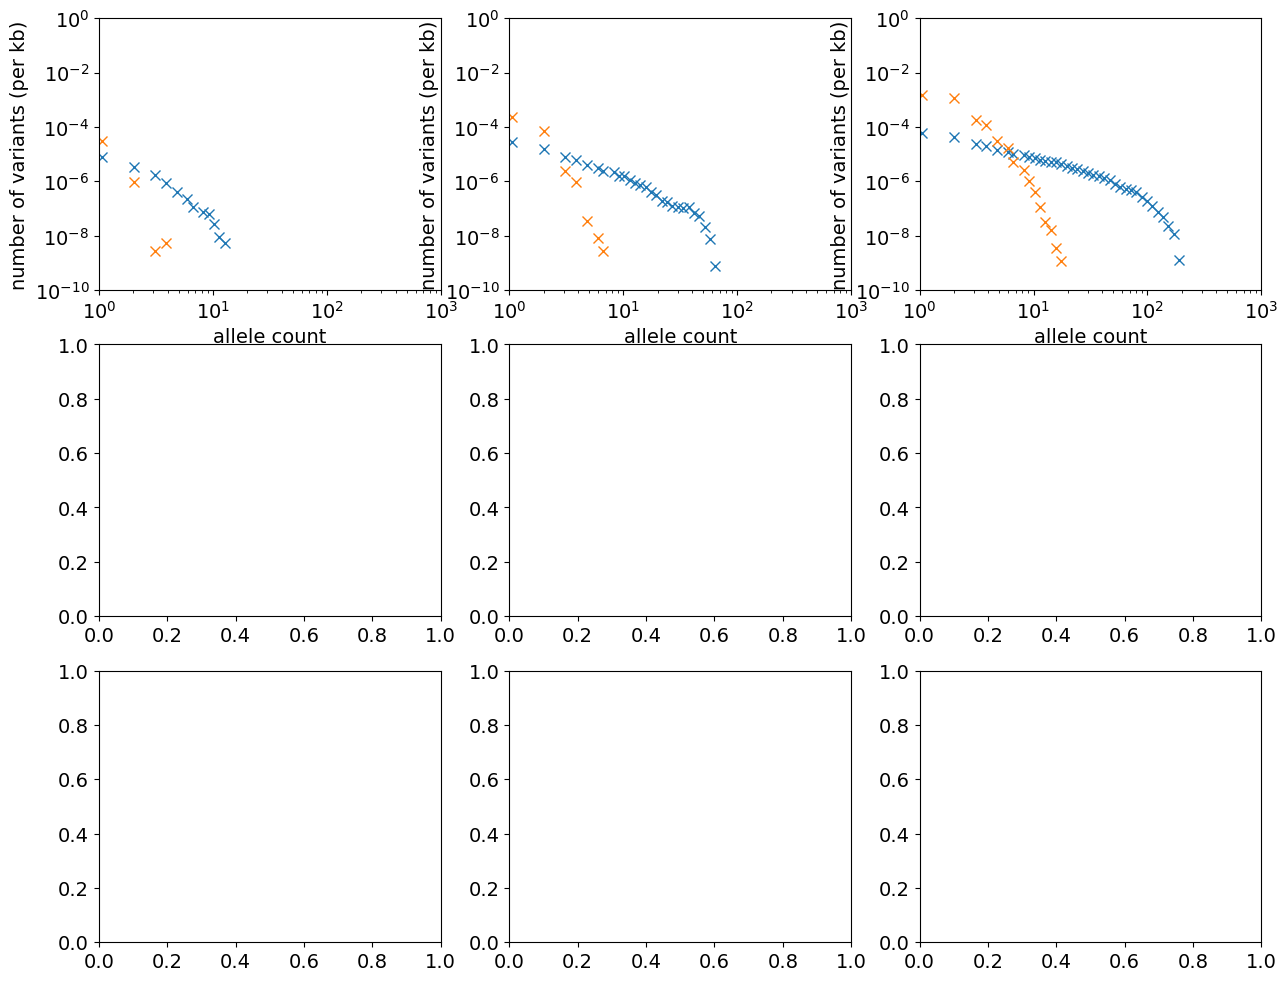

In [9]:
fig, axs = plt.subplots(3,3,figsize=(15,12))

for i,n in enumerate(nvals):
    for j,width in enumerate(vals_to_plot):
        sfs_data = slim_data_s_01
        sfs_temp = sfs_data[(sfs_data['width'] == width) & (sfs_data['sampnum']==n)]
        lab_temp = f"$w$={round(vals_to_plot[j],3)} (SLiM)" #if width == vals_to_plot[0] else "broad (SLiM)"
        axs[i,0].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], label=lab_temp, marker='x',linestyle='None',color=colors[j],markersize=7)
        axs[i,0].set_xscale("log")
        axs[i,0].set_yscale("log")
        axs[i,0].set_ylim(1e-10, 1e0)
        axs[i,0].set_xlim(1e0,1e3)
        axs[i,0].set_xlabel("allele count")
        axs[i,0].set_ylabel("number of variants (per kb)")
        
        sfs_data = slim_data_s_001
        sfs_temp = sfs_data[(sfs_data['width'] == width) & (sfs_data['sampnum']==n)]
        # lab_temp = "narrow (SLiM)" if width == vals_to_plot[0] else "broad (SLiM)"
        axs[i,1].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], label=lab_temp, marker='x',linestyle='None',color=colors[j],markersize=7)
        axs[i,1].set_xscale("log")
        axs[i,1].set_yscale("log")
        axs[i,1].set_ylim(1e-10, 1e0)
        axs[i,1].set_xlim(1e0,1e3)
        axs[i,1].set_xlabel("allele count")
        axs[i,1].set_ylabel("number of variants (per kb)")
    
        sfs_data = slim_data_s_0001
        sfs_temp = sfs_data[(sfs_data['width'] == width) & (sfs_data['sampnum']==n)]
        # lab_temp = "narrow (SLiM)" if width == vals_to_plot[0] else "broad (SLiM)"
        axs[i,2].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], label=lab_temp, marker='x',linestyle='None',color=colors[j],markersize=7)
        axs[i,2].set_xscale("log")
        axs[i,2].set_yscale("log")
        axs[i,2].set_ylim(1e-10, 1e0)
        axs[i,2].set_xlim(1e0,1e3)
        axs[i,2].set_xlabel("allele count")
        axs[i,2].set_ylabel("number of variants (per kb)")

    scale = 1000
    
    sfs_w0 = [get_sfs_theory(x,n=n,mu=mu,s=s_list[0],rho=dens,sigma=sigmaval,w=vals_to_plot[0]*wadj)*scale for x in range(0,kmax,step)]
    sfs_w1 = [get_sfs_theory(x,n=n,mu=mu,s=s_list[0],rho=dens,sigma=sigmaval,w=vals_to_plot[1]*wadj)*scale for x in range(0,kmax,step)]
    axs[i,0].plot(range(0, kmax, step), sfs_w0, label=f"$w$={round(vals_to_plot[0],3)} (theory)", marker='None',color=colors[0])
    axs[i,0].plot(range(0, kmax, step), sfs_w1, label=f"$w$={round(vals_to_plot[1],3)} (theory)", marker='None',color=colors[1])
    axs[i,0].set_xscale("log")
    axs[i,0].set_yscale("log")
    axs[i,0].set_ylim(1e-10, 1e0)
    axs[i,0].set_xlim(1e0,1e3)
    axs[i,0].set_xlabel("allele count")
    axs[i,0].set_ylabel("number of variants (per kb)")
    
    sfs_w0 = [get_sfs_theory(x,n=n,mu=mu,s=s_list[1],rho=dens,sigma=sigmaval,w=vals_to_plot[0]*wadj)*scale for x in range(0,kmax,step)]
    sfs_w1 = [get_sfs_theory(x,n=n,mu=mu,s=s_list[1],rho=dens,sigma=sigmaval,w=vals_to_plot[1]*wadj)*scale for x in range(0,kmax,step)]
    axs[i,1].plot(range(0, kmax, step), sfs_w0, label=f"$w$={round(vals_to_plot[0],3)} (theory)", marker='None',color=colors[0])
    axs[i,1].plot(range(0, kmax, step), sfs_w1, label=f"$w$={round(vals_to_plot[1],3)} (theory)", marker='None',color=colors[1])
    axs[i,1].set_xscale("log")
    axs[i,1].set_yscale("log")
    axs[i,1].set_ylim(1e-10, 1e0)
    axs[i,1].set_xlim(1e0,1e3)
    axs[i,1].set_xlabel("allele count")
    axs[i,1].set_ylabel("number of variants (per kb)")

    sfs_w0 = [get_sfs_theory(x,n=n,mu=mu,s=s_list[2],rho=dens,sigma=sigmaval,w=vals_to_plot[0]*wadj)*scale for x in range(0,kmax,step)]
    sfs_w1 = [get_sfs_theory(x,n=n,mu=mu,s=s_list[2],rho=dens,sigma=sigmaval,w=vals_to_plot[1]*wadj)*scale for x in range(0,kmax,step)]
    axs[i,2].plot(range(0, kmax, step), sfs_w0, label=f"$w$={round(vals_to_plot[0],3)} (theory)", marker='None',color=colors[0])
    axs[i,2].plot(range(0, kmax, step), sfs_w1, label=f"$w$={round(vals_to_plot[1],3)} (theory)", marker='None',color=colors[1])
    axs[i,2].set_xscale("log")
    axs[i,2].set_yscale("log")
    axs[i,2].set_ylim(1e-10, 1e0)
    axs[i,2].set_xlim(1e0,1e3)
    axs[i,2].set_xlabel("allele count")
    axs[i,2].set_ylabel("number of variants (per kb)")

    axs[i,0].set_title(f"s={s_list[0]}, n={n}")
    axs[i,1].set_title(f"s={s_list[1]}, n={n}")
    axs[i,2].set_title(f"s={s_list[2]}, n={n}")

axs[0,0].legend()
plt.tight_layout()
# plt.show()
plt.savefig("sim_theory_fit_20240726.pdf")

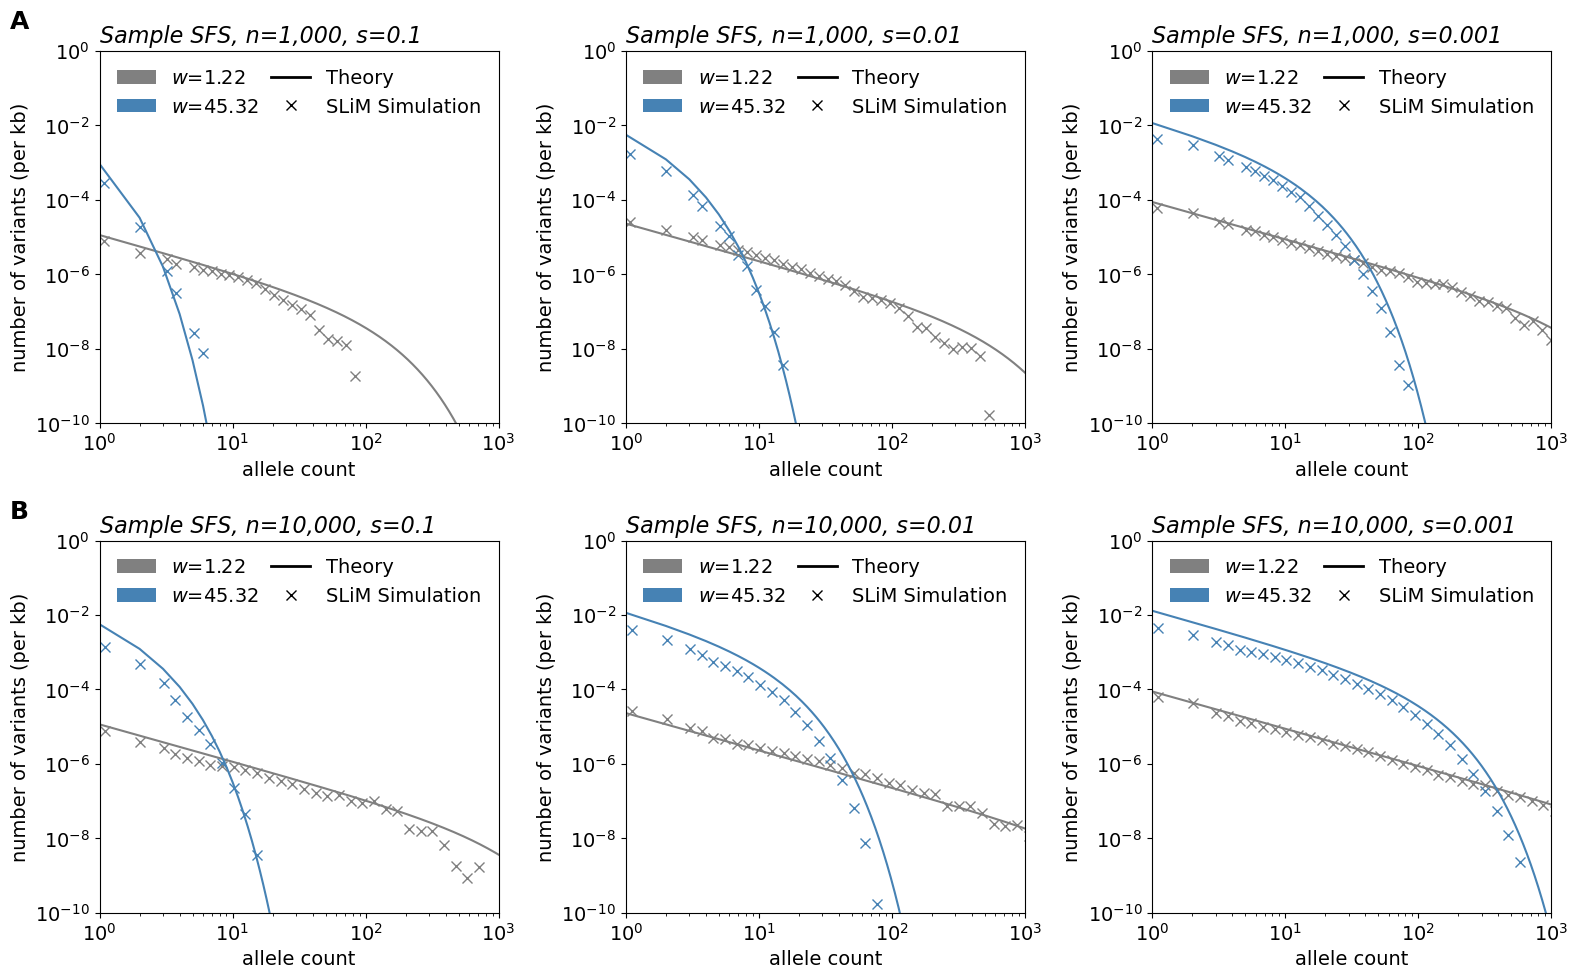

In [51]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# w_colorbar = np.linspace(0,50,20)

colors = ['gray','steelblue']

fig, axs = plt.subplots(2,3,figsize=(16,10))
nvals = [1000,10000]
for i,n in enumerate(nvals):
    for j,width in enumerate(vals_to_plot):
        sfs_data = slim_data_s_01
        sfs_temp = sfs_data[(sfs_data['width'] == width) & (sfs_data['sampnum']==n)]
        lab_temp = f"$w$={round(vals_to_plot[j],3)} (SLiM)"
        axs[i,0].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], label=lab_temp, marker='x',linestyle='None',color=colors[j],markersize=7)
        axs[i,0].set_xscale("log")
        axs[i,0].set_yscale("log")
        axs[i,0].set_ylim(1e-10, 1e0)
        axs[i,0].set_xlim(1e0,1e3)
        axs[i,0].set_xlabel("allele count")
        axs[i,0].set_ylabel("number of variants (per kb)")
        
        sfs_data = slim_data_s_001
        sfs_temp = sfs_data[(sfs_data['width'] == width) & (sfs_data['sampnum']==n)]
        # lab_temp = "narrow (SLiM)" if width == vals_to_plot[0] else "broad (SLiM)"
        axs[i,1].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], label=lab_temp, marker='x',linestyle='None',color=colors[j],markersize=7)
        axs[i,1].set_xscale("log")
        axs[i,1].set_yscale("log")
        axs[i,1].set_ylim(1e-10, 1e0)
        axs[i,1].set_xlim(1e0,1e3)
        axs[i,1].set_xlabel("allele count")
        axs[i,1].set_ylabel("number of variants (per kb)")
    
        sfs_data = slim_data_s_0001
        sfs_temp = sfs_data[(sfs_data['width'] == width) & (sfs_data['sampnum']==n)]
        # lab_temp = "narrow (SLiM)" if width == vals_to_plot[0] else "broad (SLiM)"
        axs[i,2].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], label=lab_temp, marker='x',linestyle='None',color=colors[j],markersize=7)
        axs[i,2].set_xscale("log")
        axs[i,2].set_yscale("log")
        axs[i,2].set_ylim(1e-10, 1e0)
        axs[i,2].set_xlim(1e0,1e3)
        axs[i,2].set_xlabel("allele count")
        axs[i,2].set_ylabel("number of variants (per kb)")

    scale = 1000
    
    sfs_w0 = [get_sfs_theory(x,n=n,mu=mu,s=s_list[0],rho=dens,sigma=sigmaval,w=vals_to_plot[0])*scale for x in range(0,kmax,step)]
    sfs_w1 = [get_sfs_theory(x,n=n,mu=mu,s=s_list[0],rho=dens,sigma=sigmaval,w=vals_to_plot[1])*scale for x in range(0,kmax,step)]
    axs[i,0].plot(range(0, kmax, step), sfs_w0, label=f"$w$={round(vals_to_plot[0],3)} (theory)", marker='None',color=colors[0])
    axs[i,0].plot(range(0, kmax, step), sfs_w1, label=f"$w$={round(vals_to_plot[1],3)} (theory)", marker='None',color=colors[1])
    axs[i,0].set_xscale("log")
    axs[i,0].set_yscale("log")
    axs[i,0].set_ylim(1e-10, 1e0)
    axs[i,0].set_xlim(1e0,1e3)
    axs[i,0].set_xlabel("allele count")
    axs[i,0].set_ylabel("number of variants (per kb)")
    
    sfs_w0 = [get_sfs_theory(x,n=n,mu=mu,s=s_list[1],rho=dens,sigma=sigmaval,w=vals_to_plot[0])*scale for x in range(0,kmax,step)]
    sfs_w1 = [get_sfs_theory(x,n=n,mu=mu,s=s_list[1],rho=dens,sigma=sigmaval,w=vals_to_plot[1])*scale for x in range(0,kmax,step)]
    axs[i,1].plot(range(0, kmax, step), sfs_w0, label=f"$w$={round(vals_to_plot[0],3)} (theory)", marker='None',color=colors[0])
    axs[i,1].plot(range(0, kmax, step), sfs_w1, label=f"$w$={round(vals_to_plot[1],3)} (theory)", marker='None',color=colors[1])
    axs[i,1].set_xscale("log")
    axs[i,1].set_yscale("log")
    axs[i,1].set_ylim(1e-10, 1e0)
    axs[i,1].set_xlim(1e0,1e3)
    axs[i,1].set_xlabel("allele count")
    axs[i,1].set_ylabel("number of variants (per kb)")

    sfs_w0 = [get_sfs_theory(x,n=n,mu=mu,s=s_list[2],rho=dens,sigma=sigmaval,w=vals_to_plot[0])*scale for x in range(0,kmax,step)]
    sfs_w1 = [get_sfs_theory(x,n=n,mu=mu,s=s_list[2],rho=dens,sigma=sigmaval,w=vals_to_plot[1])*scale for x in range(0,kmax,step)]
    axs[i,2].plot(range(0, kmax, step), sfs_w0, label=f"$w$={round(vals_to_plot[0],3)} (theory)", marker='None',color=colors[0])
    axs[i,2].plot(range(0, kmax, step), sfs_w1, label=f"$w$={round(vals_to_plot[1],3)} (theory)", marker='None',color=colors[1])
    axs[i,2].set_xscale("log")
    axs[i,2].set_yscale("log")
    axs[i,2].set_ylim(1e-10, 1e0)
    axs[i,2].set_xlim(1e0,1e3)
    axs[i,2].set_xlabel("allele count")
    axs[i,2].set_ylabel("number of variants (per kb)")

    
    # axs[i,0].legend()
    # axs[i,1].legend()
    # axs[i,2].legend()

    for ax in [axs[i,0],axs[i,1],axs[i,2]]:
        elements = [Patch(facecolor=colors[0],edgecolor='None',label=f'$w$={round(vals_to_plot[0],2)}'),
                Patch(facecolor=colors[1],edgecolor='None',label=f'$w$={round(vals_to_plot[1],2)}')]
        leg1 = ax.legend(handles=elements,frameon=False,loc='upper left')
        ax.add_artist(leg1)
        elements2 = [Line2D([0], [0], color='black', label='Theory', linewidth=2),
                     Line2D([0], [0], marker='x', color='w', label='SLiM Simulation', markeredgecolor='black', markersize=7)]
        ax.legend(handles=elements2,frameon=False,loc='upper right')
    

axs[0,0].set_title(f"Sample SFS, n=1,000, s={s_list[0]}",fontstyle='italic',loc='left',fontsize=16)
axs[0,1].set_title(f"Sample SFS, n=1,000, s={s_list[1]}",fontstyle='italic',loc='left',fontsize=16)
axs[0,2].set_title(f"Sample SFS, n=1,000, s={s_list[2]}",fontstyle='italic',loc='left',fontsize=16)

axs[1,0].set_title(f"Sample SFS, n=10,000, s={s_list[0]}",fontstyle='italic',loc='left',fontsize=16)
axs[1,1].set_title(f"Sample SFS, n=10,000, s={s_list[1]}",fontstyle='italic',loc='left',fontsize=16)
axs[1,2].set_title(f"Sample SFS, n=10,000, s={s_list[2]}",fontstyle='italic',loc='left',fontsize=16)

axs[0,0].text(-0.2, 1.06, 'A', transform=axs[0,0].transAxes, 
         fontsize=18, fontweight='bold', ha='center')
axs[1,0].text(-0.2, 1.06, 'B', transform=axs[1,0].transAxes, 
         fontsize=18, fontweight='bold', ha='center')

# axs[0,0].legend()
plt.tight_layout()
# plt.show()
plt.savefig("sim_theory_fit.pdf")

In [28]:
w_vals_slim

array([ 0.        ,  1.22474487,  2.44948974, 12.24744871, 24.49489743,
       45.31556024])